<a href="https://colab.research.google.com/github/yuna1998/datamining/blob/main/Chapter6_202011010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Decision Tree의 훈련, 시각화, 예측 방법
## ex) 불꽃 dataset에 DecisionTreeClassifier 훈련

In [2]:
import sklearn

In [3]:
import numpy as np
import os
np.random.seed(42) ## seed 설정하면 결과 동일하게 유지 가능

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize = 14)
mpl.rc("xtick", labelsize = 12)
mpl.rc("ytick", labelsize = 12)

In [6]:
## Decision Tree 학습 & 시각화
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [7]:
iris = load_iris()
X = iris.data[:, 2:] ## 꽃잎 길이, 너비
y = iris.target

In [8]:
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)

In [9]:
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [10]:
## export_graphviz 함수 이용해 그래프 정의를 iris_tree.dot 파일로 출력 후 훈련된 결정 트리 시각화 가능
from sklearn.tree import export_graphviz
from graphviz import Source

In [11]:
project_root_dir = "."
chapter_id = "Decision Tree"
images_path = os.path.join(project_root_dir, "images", chapter_id)
os.makedirs(images_path, exist_ok = True)

In [13]:
export_graphviz(
    tree_clf,
    out_file = os.path.join(images_path, "iris_tree.dot"),
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

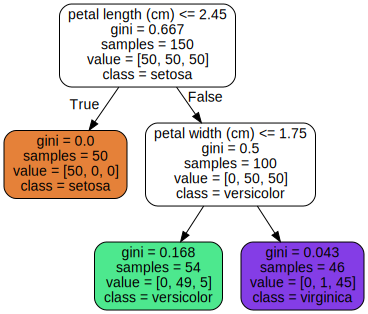

In [14]:
Source.from_file(os.path.join(images_path, "iris_tree.dot"))

In [15]:
## 붓꽃 결정 트리 

In [16]:
## 목표 : 새로 발견한 붓꽃 품종 분류 
## 루트 노드(깊이 0, 맨 꼭대기)부터 시작
## sklearn은 이진 트리만 만드는 CART 알고리즘 사용

In [17]:
## Decision Tree는 한 샘플이 특정 클래스 k에 속할 확률 추정 가능함.
tree_clf.predict_proba([[5, 1.5]]) ## 길이가 5cm 너비가 1.5cm

array([[0.        , 0.90740741, 0.09259259]])

In [18]:
tree_clf.predict([[5, 1.5]])

array([1])

In [19]:
## 훈련 세트를 하나의 특성 k의 임곗값을 사용해 두 개의 서브셋으로 나눔 
## 이 때, 비용함수를 통해 비용 최소화 시키는 값 구함

In [20]:
## 일반적으로 Decision Tree는 거의 균형을 이루고 있음 -> O(long2(m))개의 노드 거쳐야 함
## 큰 훈련 세트를 다룰 때에도 예측 속도 빠름


In [21]:
## min_samples_split : 분할되기 위해 노드가 가져야 하는 최소 샘플 수
## min_saples_leaf : 리프 노드가 가지고 있어야 할 최소 샘플 수
## min_weight_fraction_loead : 가중치가 부여된 전체 샘플 수에서의 비율
## max_leaf_nodes : 리프 노드의 최대 수
## max_features : 각 노드에서 분할에 사용할 특성의 최대 수
## min_으로 시작하는 매개변수를 증가하거나, max_로 시작하는 매개변수 감소시키면 모델 규제 커짐

In [22]:
## 회귀
## DecisinTreeRegressor 사용해 잡음이 섞인 2차 함수 형태의 dataset에서 max_depth는 2로 설정

In [38]:
##2차식으로 만든 dataset  & noise
m = 200
X = np.random.rand(m,1)
y = 4 * (X - 0.5) **2
y = y + np.random.randn(m,1)  / 10

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
tree_reg = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [39]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg1.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [40]:
##트리 그리기
export_graphviz(
        tree_reg1,
        out_file=os.path.join(images_path, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

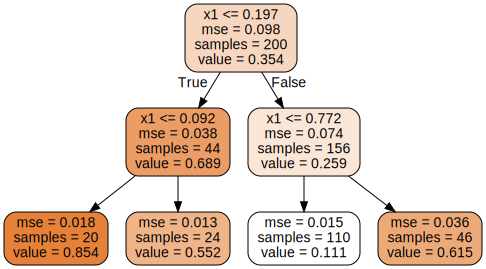

In [41]:
Source.from_file(os.path.join(images_path, "regression_tree.dot"))

In [42]:
 1## 연습문제 7번
 ## a

 from sklearn.datasets import make_moons
 

In [43]:
X, y = make_moons(n_samples = 10000, noise = 0.4, random_state = 42) ## randomstate 사용하면 결과가 항상 일정하게 나옴

In [44]:
##b
from sklearn.model_selection import train_test_split ## split package 사용해 간단하게 split 가능

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [46]:
##c
from sklearn.model_selection import GridSearchCV

In [47]:
params = {"max_leaf_nodes" : list( range(2,100)), 
          "min_samples_split" : [2,3,4]}

In [48]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier( random_state = 42), params, verbose = 1, cv = 3)

In [50]:
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    9.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [52]:
grid_search_cv.best_estimator_ ##최고의 param 확인

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [53]:
##d
from sklearn.metrics import accuracy_score ## 모델 정확도 측정법

In [54]:
y_pred = grid_search_cv.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred)

0.8695